In [ ]:
import requests
from bs4 import BeautifulSoup
import datetime
import csv
import pandas as pd
import re

In [ ]:
# Constants
News_URL = "https://www.prnewswire.com/news-releases/news-releases-list/?"
#News_URL = "https://www.prnewswire.com/news-releases/news-releases-list/?month=11&day=24&year=2021&hour=00&page=1&pagesize=100"

Total_Days = 7 #Number of days to fetch
StockIndustry_Search = 'NYSE'
StockSymbol_Required = 2

In [ ]:
# Global Variables
arr_Date = []
arr_newsTitle = []
arr_newsPara = []

In [ ]:
# Date for extracting webpage
currentDate = datetime.datetime.now()
tempDate = currentDate

In [ ]:
def prepare_URL(dayToFetch) -> str:
   urlByDay = News_URL + 'month=' + str(currentDate.month) + '&day=' + str(dayToFetch) + '&year=' + str(currentDate.year) + '&hour=00&page=1&pagesize=100'
   return urlByDay

In [ ]:
def parse_News(forDay):
  url = prepare_URL(forDay)
  page = requests.get(url)
  soup = BeautifulSoup(page.content, "html.parser")

  # to extract main layout content
  main = soup.find_all('main',class_='headline-listing')

  for elements in main:
    lstContainer = elements.find_all('section',class_='container')
    for mainHead in lstContainer:
      row = mainHead.find_all('div',class_='row')
      for mainCol in row:
        rowList = mainCol.find_all('div',class_='col-md-8 col-sm-8 card-list card-list-hr')
        for newsCard in rowList:
          newsLst = newsCard.find_all('a',class_='newsreleaseconsolidatelink')
          for content in newsLst:
            small = content.h3.small.text
            content.h3.small.decompose()
            h3 = content.h3.text.replace("\n", "")
            p =  content.p.text
            arr_Date.append(small)
            arr_newsTitle.append(h3)
            arr_newsPara.append(p)

In [ ]:
#Fetch & Parse data of last week
i = 0
while i < Total_Days:
  parse_News(currentDate.day - i)
  i = i + 1

In [ ]:
# Write data to csv
dictNews = {'Date': arr_Date, 'Title': arr_newsTitle, 'Content': arr_newsPara}
df = pd.DataFrame(dictNews)
df.to_csv('newsData.csv')

df.head()

,Date,Title,Content
0,18:06 ET,DEADLINE: Playtika Holding Corp. Investors wit...,Robbins Geller Rudman & Dowd LLP announces tha...
1,17:00 ET,"ROSEN, TRUSTED AND TOP RANKED INVESTOR COUNSEL...","WHY: Rosen Law Firm, a global investor rights ..."
2,16:00 ET,"ROSEN, TRUSTED INVESTOR COUNSEL, Encourages Zh...","WHY: Rosen Law Firm, a global investor rights ..."
3,13:13 ET,Best Cyber Monday Deals 2021 - Continue Discou...,The first Cyber Monday deals of 2021 will be h...
4,12:14 ET,Tendances crypto dans l'iGaming : aperçus de S...,SOFTSWISS offre des statistiques et des inform...


In [ ]:
#Search stock symbols of given industry

searchString = StockIndustry_Search + ': ([a-zA-Z]+)'
df_stockSymbols = df['Content'].str.extract(searchString, expand=False)
print(StockIndustry_Search)
# Dropping the duplicates 
df_stockSymbols = df_stockSymbols.drop_duplicates()

# Dropping the missing values.
df_stockSymbols = df_stockSymbols.dropna() 

NYSE


In [ ]:
df_stock_list = df_stockSymbols


 CPLG
  ENB
  BMO
  CRM
 YEXT
  AWF
  AEM
 SNAP
 HRTG
 CHGG
 GOTU
 AMPY
  SLI
 FICO
 ONTF
  RDW
 OSCR
 FTCH
  OSH
   DM
 BKKT
  ZME
 HMLP
  DNA
  GWH
 LSPD
  BTG
  BMA
  KBR
  LTH
 ZEPP
   CO
   SM
   EC
  ACN
  ROK
 MATX
   CP
  WDH
  ATH
  GWB
  ROG
  EBS
   FE
  COR
 FTSI


In [ ]:
from random import randint


sample_pick = (df_stock_list.sample(2))

In [ ]:
stock_list  = sample_pick.to_string(index=False)
print(type(stock_list))

random_pick = stock_list.split()
print(random_pick)

<class 'str'>
['ROK', 'ACN']


#Yahoo Finance API


In [ ]:
pip install yahoofinancials

  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-py3-none-any.whl size=15190 sha256=b0bef1175cb3364ed5408b16850eb33b14945345262081353f037e1367416962
  Stored in directory: /root/.cache/pip/wheels/4b/63/46/e7110bfee88685fe69e338d1b14d1748921862aa57b6705b60
Successfully built yahoofinancials


In [ ]:
pip install yfinance

     |████████████████████████████████| 6.3 MB 7.5 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials

In [ ]:
stock_df = yf.download(random_pick, 
                      start='2019-01-01', 
                      end='2021-06-12', 
                      progress=False,
)
stock_df.head()

Adj Close                   Close  ...        Open   Volume         
                   ACN         ROK         ACN  ...         ROK      ACN      ROK
Date                                            ...                              
2019-01-02  134.976608  142.401642  140.589996  ...  148.520004  2059300   948300
2019-01-03  130.368256  137.370819  135.789993  ...  149.360001  2801300  1190900
2019-01-04  135.437454  141.703201  141.070007  ...  148.199997  2296400  1045000
2019-01-07  135.907867  142.883026  141.559998  ...  150.399994  2315600   864900
2019-01-08  139.344925  144.751877  145.139999  ...  152.199997  2647800   924400

[5 rows x 12 columns]

In [ ]:
stock_df = yf.download(random_pick)

[*********************100%***********************]  2 of 2 completed


In [ ]:
stock_list  = sample_pick.to_string(index=False)
print(type(stock_list))

random_pick = stock_list.split()
print(random_pick)

<class 'str'>
['ROK', 'ACN']


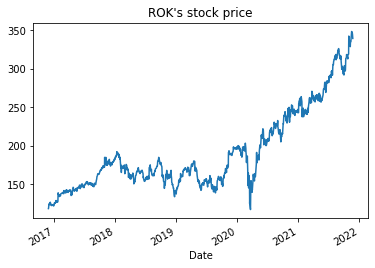

In [ ]:
ticker = yf.Ticker(random_pick[0])
stock_df = ticker.history(period="5y")
stock_df['Close'].plot(title=random_pick[0] + "'s stock price")

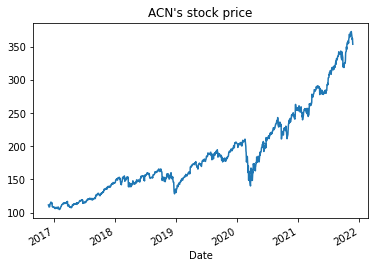

In [ ]:
ticker = yf.Ticker(random_pick[1])
stock_df = ticker.history(period="5y")
stock_df['Close'].plot(title=random_pick[1] + "'s stock price")

In [ ]:
yahoo_financials = YahooFinancials(random_pick)
data = yahoo_financials.get_historical_price_data(start_date='2019-01-01', 
                                                  end_date='2019-12-31', 
                                                  time_interval='weekly')
stock_df = pd.DataFrame(data[random_pick[0]]['prices'])
stock_df = stock_df.drop('date', axis=1).set_index('formatted_date')
stock_df.head()

,high,low,open,close,volume,adjclose
formatted_date,,,,,,
2019-01-01,153.500000,145.210007,148.520004,151.380005,4049100,142.883041
2019-01-08,157.220001,150.240005,152.199997,156.199997,5566600,147.432495
2019-01-15,165.839996,153.940002,156.289993,164.750000,4728300,155.502594
2019-01-22,166.929993,159.850006,163.710007,163.250000,5451000,154.086746
2019-01-29,179.899994,166.309998,179.800003,169.679993,8498500,160.155838


In [ ]:
yahoo_financials = YahooFinancials(random_pick[1])
data=yahoo_financials.get_historical_price_data("2019-07-10", "2021-05-30", "monthly")
btc_df = pd.DataFrame(data[random_pick[1]]['prices'])
btc_df = btc_df.drop('date', axis=1).set_index('formatted_date')
btc_df.head()

,high,low,open,close,volume,adjclose
formatted_date,,,,,,
2019-08-01,200.679993,184.229996,193.330002,198.169998,40805700,191.833435
2019-09-01,202.800003,187.279999,196.360001,192.350006,43457400,186.199554
2019-10-01,193.369995,181.970001,192.600006,185.419998,42679200,179.491150
2019-11-01,201.660004,185.479996,186.699997,201.160004,30349000,195.564499
2019-12-01,213.250000,196.470001,201.440002,210.570007,39647400,204.712738
